In [ ]:
import pandas as pd
df = pd.read_csv('tweets.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


In [ ]:
df.head() #Deskripsi dataset

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
df = df.drop(columns=['id', 'keyword', 'location'], axis=1) #menghapus kolom id, keyword, dan location karena tidak digunakan untuk analisis

In [ ]:
text = df['text'].values #menggunakan kolom teks untuk atribut lalu mengubahnya ke np array
label = df['target'].values #menggunakan kolom target untuk label lalu mengubahnya ke np array

In [ ]:
import re

df['text'] = df['text'].map(lambda x: re.sub(r'\W+', ' ', x)) #menghapus special karakter

In [ ]:
from sklearn.model_selection import train_test_split

text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2) #split train dan test sebanyak 0.2 untuk test data

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)

sekuens_train = tokenizer.texts_to_sequences(text_train)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98 and logs.get('val_accuracy')>0.98):
      print("\nAkurasi train dan validasi didapat telah mencapai nilai > 98%!")
      self.model.stop_training = True
callbacks = myCallback() #membuat callback

In [ ]:
num_epochs = 30
history = model.fit(padded_train, label_train, epochs=num_epochs, validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
285/285 - 2s - loss: 0.2258 - accuracy: 0.9192 - val_loss: 0.3044 - val_accuracy: 0.8852 - 2s/epoch - 6ms/step
Epoch 2/30
285/285 - 2s - loss: 0.1648 - accuracy: 0.9398 - val_loss: 0.3631 - val_accuracy: 0.8835 - 2s/epoch - 6ms/step
Epoch 3/30
285/285 - 2s - loss: 0.1217 - accuracy: 0.9567 - val_loss: 0.4024 - val_accuracy: 0.8830 - 2s/epoch - 6ms/step
Epoch 4/30
285/285 - 2s - loss: 0.0972 - accuracy: 0.9665 - val_loss: 0.4802 - val_accuracy: 0.8826 - 2s/epoch - 6ms/step
Epoch 5/30
285/285 - 2s - loss: 0.0652 - accuracy: 0.9793 - val_loss: 0.5707 - val_accuracy: 0.8777 - 2s/epoch - 6ms/step
Epoch 6/30
285/285 - 2s - loss: 0.0520 - accuracy: 0.9819 - val_loss: 0.6607 - val_accuracy: 0.8729 - 2s/epoch - 6ms/step
Epoch 7/30
285/285 - 2s - loss: 0.0404 - accuracy: 0.9865 - val_loss: 0.7799 - val_accuracy: 0.8773 - 2s/epoch - 6ms/step
Epoch 8/30
285/285 - 2s - loss: 0.0312 - accuracy: 0.9893 - val_loss: 0.7238 - val_accuracy: 0.8764 - 2s/epoch - 6ms/step
Epoch 9/30
285/285 - 2s 

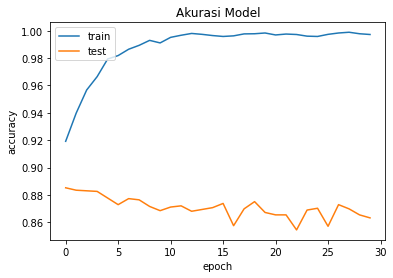

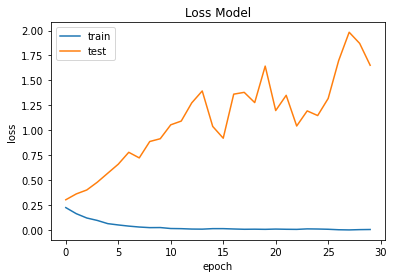

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()